# Walmart Sales Analysis (2010-2012)

We chose a dataset on 45 different US Walmart locations. Since the dataset includes datapoints on weekly fuel price, Consumer Price Index, and the unemployment rate in each Walmart's location, we determined it would make sense to analyze weekly sales as a whole + compared between stores (With special attention to the stores that performed the best and worst compared to the total average), and further search for correlations between sales and the aforementioned factors.

First, our imports, both libraries, and the data itself:

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
walmart_df = pd.read_csv("Walmart.csv")
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# **TO DO**

INTRO:
- Sales as a whole: mean, max, min
- Store with sales min: mean, max, min, compare to total avg stats (store 33)
- Store with sales max: mean, max, min, compare to total avg stats (store 20)

COMPARISONS:
- Sales + CPI: any correlations; 
- Sales + Fuel Price: any correlations
- Sales + Unemployment Rate: any correlations

EXTRA:
- explain outliers in data with columns not mentioned ex. holiday, maybe temperature, etc

To start with, let's look at the sales data as a whole (note: it's worth noting that sales are expressed in millions, with 0.5 being half a million, etc; fix later?):

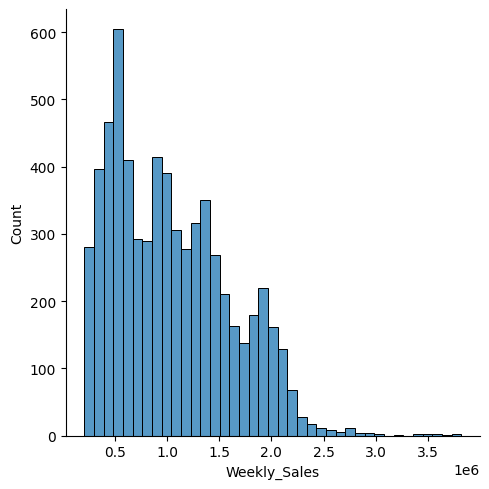

In [15]:
sns.displot(walmart_df, x="Weekly_Sales")
totalstats = walmart_df["Weekly_Sales"].describe()

totalmean = totalstats["mean"]
totalmax = totalstats["max"]
totalmin = totalstats["min"]

#plt.plot(totalmean, marker = "_", label = "Mean", color = "cyan")

plt.show()

First, we split up the main dataframe by stores:

In [3]:
for x in range(1, 46):
    exec(f'Store{x}_df = walmart_df[walmart_df["Store"] == {x}]')